In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import scipy as sc
from matplotlib.colors import LogNorm



from simulation import *
from aesthetics import *
from plot import * 
prepare_plot()

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

# Does reciprocating flux change with an applied load?

In [2]:
loads = np.linspace(-0.000002, 0.000001, 20)
reciprocating_fluxes = np.zeros(( len(loads) ))
directional_fluxes   = np.zeros(( len(loads) ))


for i, load in enumerate(loads):
    this = Simulation(data_source = 'adk_md_data')
    this.name = 'chi2THR175'
    this.load = True
    this.load_slope = load
    this.cSubtrate = 10**-0.1
    this.simulate()
    directional_fluxes[i] = np.mean(this.flux_u + this.flux_b)
    max_unbound = max(abs(this.flux_u))
    max_bound = max(abs(this.flux_b))
    reciprocating_fluxes[i] = np.max([max_unbound, max_bound])
    print(f'Load {load:.7f}, Directional flux {directional_fluxes[i]:.2f} Reciprocating flux {reciprocating_fluxes[i]:.2f}')

Load -0.0000020, Directional flux 2.24 Reciprocating flux 3.63
Load -0.0000018, Directional flux 1.96 Reciprocating flux 3.36
Load -0.0000017, Directional flux 1.69 Reciprocating flux 3.08
Load -0.0000015, Directional flux 1.42 Reciprocating flux 2.81
Load -0.0000014, Directional flux 1.15 Reciprocating flux 2.54
Load -0.0000012, Directional flux 0.88 Reciprocating flux 2.27
Load -0.0000011, Directional flux 0.61 Reciprocating flux 2.00
Load -0.0000009, Directional flux 0.34 Reciprocating flux 1.73
Load -0.0000007, Directional flux 0.07 Reciprocating flux 1.46
Load -0.0000006, Directional flux -0.21 Reciprocating flux 1.39
Load -0.0000004, Directional flux -0.48 Reciprocating flux 1.39
Load -0.0000003, Directional flux -0.75 Reciprocating flux 1.39
Load -0.0000001, Directional flux -1.02 Reciprocating flux 1.39
Load 0.0000001, Directional flux -1.29 Reciprocating flux 1.51
Load 0.0000002, Directional flux -1.56 Reciprocating flux 1.78
Load 0.0000004, Directional flux -1.83 Reciprocatin

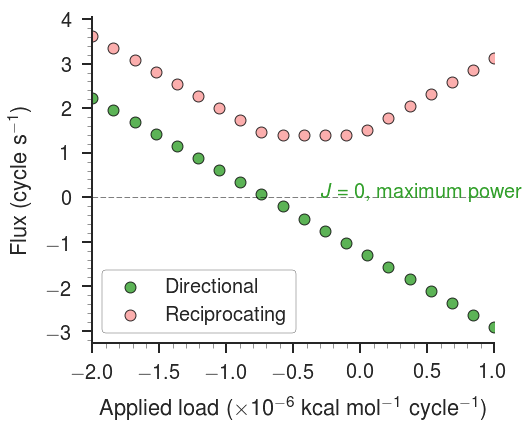

In [3]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(loads, directional_fluxes, s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[3], label='Directional')
ax1.scatter(loads, reciprocating_fluxes, s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[4], label='Reciprocating')

ax1.set_ylabel('Flux (cycle s$^{-1}$)')
ax1.set_xlabel('Applied load (kcal mol$^{-1}$ cycle$^{-1}$)')
ax1.legend(frameon=True, loc=3, framealpha=1.0, edgecolor='k')
ax1.set_xlim([-0.000002, 0.000001])
ax1.axhline(y=0, ls='--', c='k', lw=0.5)
ax1.annotate('$J = 0$, maximum power', xy=(-0.0000003,0.01), xycoords='data', 
             fontsize=20, color=cmap[3])


paper_plot(fig)
pretty_label(ax1)

In [4]:
loads = np.linspace(-0.000002, 0.000001, 20)
unbound_fluxes = np.zeros(( len(loads), 60 ))
bound_fluxes = np.zeros(( len(loads), 60 ))

for i, load in enumerate(loads):
    this = Simulation(data_source = 'adk_md_data')
    this.name = 'chi2THR175'
    this.load = True
    this.load_slope = load
    this.cSubtrate = 10**-0.1
    this.simulate()
    unbound_fluxes[i] = this.flux_u
    bound_fluxes[i] = this.flux_b

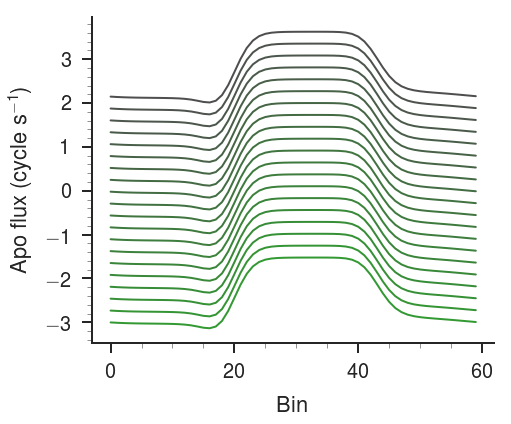

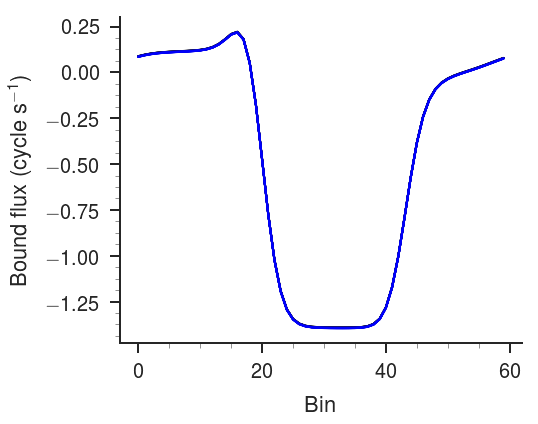

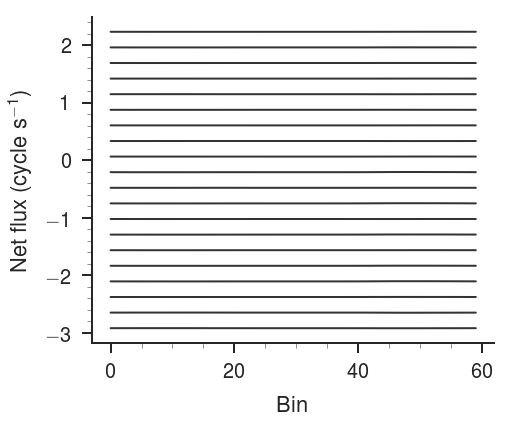

In [5]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])
cmap = sns.dark_palette('green', n_colors=20)
for i, flux in enumerate(unbound_fluxes):
    ax1.plot(range(60), flux, alpha=0.8, lw=2, c=cmap[i])

ax1.set_ylabel('Apo flux (cycle s$^{-1}$)')
ax1.set_xlabel('Bin')
paper_plot(fig)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])
cmap = sns.dark_palette('blue', n_colors=20)
for i, flux in enumerate(bound_fluxes):
    ax1.plot(range(60), flux, alpha=0.8, lw=2, c=cmap[i])

ax1.set_ylabel('Bound flux (cycle s$^{-1}$)')
ax1.set_xlabel('Bin')
paper_plot(fig)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])
for apo_flux, bound_flux in zip(unbound_fluxes, bound_fluxes):
    ax1.plot(range(60), apo_flux + bound_flux, alpha=0.8, lw=2, c='k')

ax1.set_ylabel('Net flux (cycle s$^{-1}$)')
ax1.set_xlabel('Bin')
paper_plot(fig)

In [18]:
loads = np.linspace(-2, 1, 20)
unbound_surfaces = np.zeros(( len(loads), 60 ))
bound_surfaces = np.zeros(( len(loads), 60 ))

for i, load in enumerate(loads):
    this = Simulation(data_source = 'adk_md_data')
    this.name = 'chi2THR175'
    this.load = True
    this.load_slope = load
    this.cSubtrate = 10**-0.1
    this.simulate()
    unbound_surfaces[i] = [this.unbound[i] + this.load_function(i) for i in range(this.bins)]
    bound_surfaces[i] = [this.bound[i] + this.load_function(i) for i in range(this.bins)]
    unbound_population = np.sum(this.ss[0:this.bins])
    bound_population = np.sum(this.ss[this.bins:2*this.bins])
    print(f'Apo population: {unbound_population:.4f}\tBound population: {bound_population:.4f}')

/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:242: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


Apo population: 0.9948	Bound population: 0.0052
Apo population: 0.9947	Bound population: 0.0053
Apo population: 0.9946	Bound population: 0.0054
Apo population: 0.9945	Bound population: 0.0055
Apo population: 0.9944	Bound population: 0.0056
Apo population: 0.9943	Bound population: 0.0057
Apo population: 0.9942	Bound population: 0.0058
Apo population: 0.9941	Bound population: 0.0059
Apo population: 0.9940	Bound population: 0.0060
Apo population: 0.9939	Bound population: 0.0061
Apo population: 0.9938	Bound population: 0.0062
Apo population: 0.9937	Bound population: 0.0063
Apo population: 0.9936	Bound population: 0.0064
Apo population: 0.9936	Bound population: 0.0064
Apo population: 0.9935	Bound population: 0.0065
Apo population: 0.9934	Bound population: 0.0066
Apo population: 0.9933	Bound population: 0.0067
Apo population: 0.9933	Bound population: 0.0067
Apo population: 0.9932	Bound population: 0.0068
Apo population: 0.9932	Bound population: 0.0068


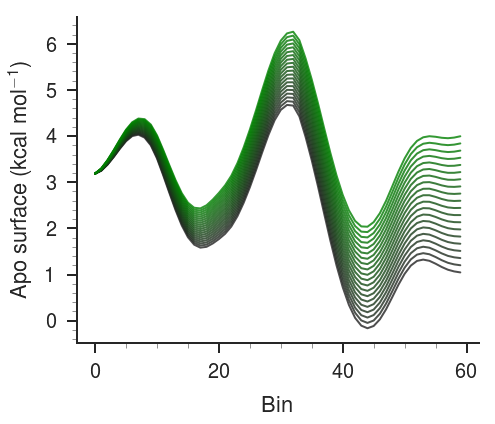

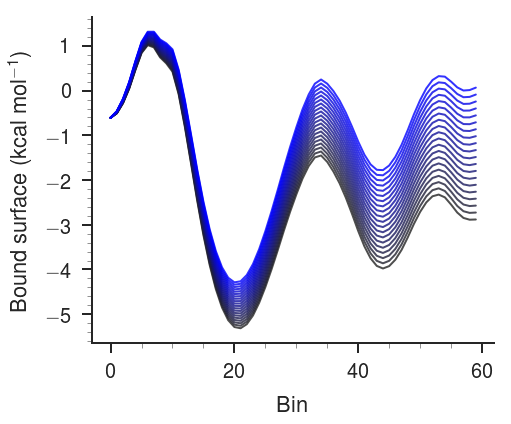

In [15]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])
cmap = sns.dark_palette('green', n_colors=20)
for i, surface in enumerate(unbound_surfaces):
    ax1.plot(range(60), surface, alpha=0.8, lw=2, c=cmap[i])

ax1.set_ylabel('Apo surface (kcal mol$^{-1}$)')
ax1.set_xlabel('Bin')
paper_plot(fig)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])
cmap = sns.dark_palette('blue', n_colors=20)
for i, surface in enumerate(bound_surfaces):
    ax1.plot(range(60), surface, alpha=0.8, lw=2, c=cmap[i])

ax1.set_ylabel('Bound surface (kcal mol$^{-1}$)')
ax1.set_xlabel('Bin')
paper_plot(fig)